Average Telehealth Usage Rate by Age Group (Medicare Data):
  Bene_Age_Desc  Pct_Telehealth
0          0-64       32.141818
1         65-74       18.677157
2         75-84       18.159245
3   85 and over       17.841672
ANOVA result：F = 394.04, p = 1.395e-230


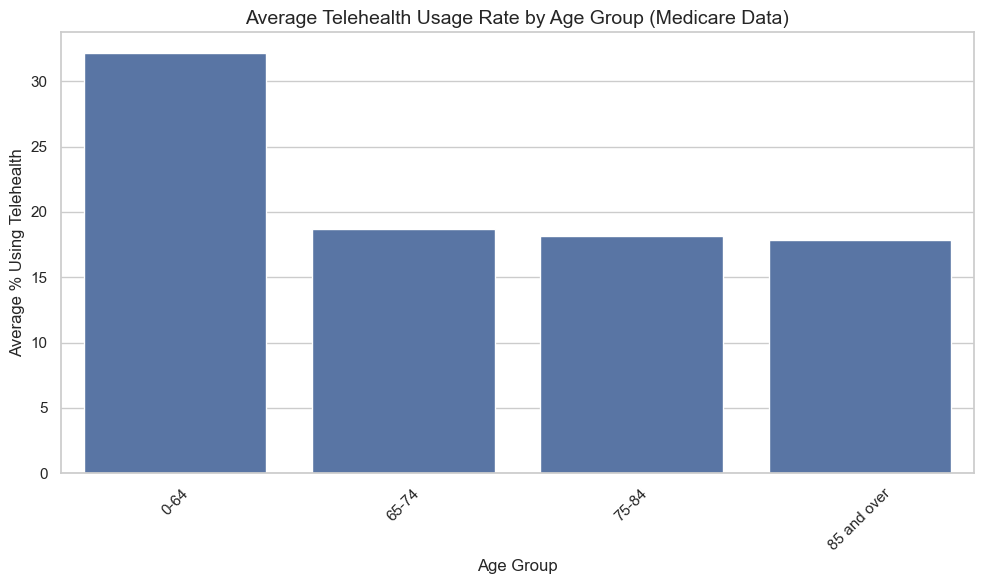

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv("medicare_cleaned.csv")
age_df = df[df["Bene_Age_Desc"] != "All"]

age_group_avg = age_df.groupby("Bene_Age_Desc")["Pct_Telehealth"].mean().reset_index()
age_group_avg = age_group_avg.sort_values(by="Pct_Telehealth", ascending=False)
age_group_avg["Pct_Telehealth"] = age_group_avg["Pct_Telehealth"]*100

print("Average Telehealth Usage Rate by Age Group (Medicare Data):")
print(age_group_avg)

# ANOVA
anova_groups = [age_df[age_df["Bene_Age_Desc"] == age]["Pct_Telehealth"] 
                for age in age_group_avg["Bene_Age_Desc"]]

f_stat, p_value = f_oneway(*anova_groups)
print(f"ANOVA result：F = {f_stat:.2f}, p = {p_value:.3e}")


plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_avg, x="Bene_Age_Desc", y="Pct_Telehealth")
plt.title("Average Telehealth Usage Rate by Age Group (Medicare Data)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average % Using Telehealth")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Telehealth Usage Rate by Age Group (Telehealth Data):
             Subgroup      Value
6  80 years and above  28.152381
5       70 - 79 years  24.585714
3       50 - 59 years  23.247619
4       60 - 69 years  22.857143
2       40 - 49 years  21.604762
1       30 - 39 years  20.980952
0       18 - 29 years  18.261905
ANOVA result：F = 30.36, p = 3.840e-23


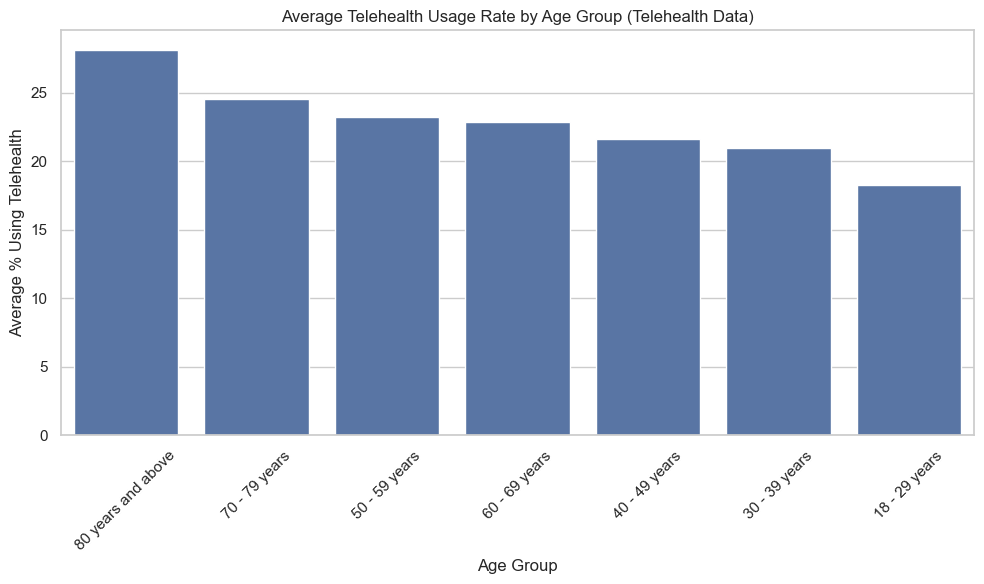

In [26]:
df_age = pd.read_csv("telemedicine_group_By_Age.csv")


age_means = df_age.groupby("Subgroup")["Value"].mean().reset_index()
age_means = age_means.sort_values(by="Value", ascending=False)
print("Average Telehealth Usage Rate by Age Group (Telehealth Data):")
print(age_means)

# ANOVA
anova_groups = [df_age[df_age["Subgroup"] == age]["Value"] for age in age_means["Subgroup"]]
f_stat, p_value = f_oneway(*anova_groups)
print(f"ANOVA result：F = {f_stat:.2f}, p = {p_value:.3e}")


plt.figure(figsize=(10, 6))
sns.barplot(data=age_means, x="Subgroup", y="Value")
plt.title("Average Telehealth Usage Rate by Age Group (Telehealth Data)")
plt.xlabel("Age Group")
plt.ylabel("Average % Using Telehealth")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
